In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Wynik walidacji krzyżowej na zbiorze ,,Advertising and Sales''. Najpierw mamy ewaluację modeli wielomianowych na zbiorze walidacyjnym (optymalny stopień wielomianu to 3). Następnie pokazujemy porównanie wyników osiągniętych przez wszystkie modele dla zbioru treningowego i testowego, które potwierdzają zasadność walidacji krzyżowej.

In [2]:
df_adv = pd.read_csv('Advertising.csv', index_col=0)
df_adv.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
X = df_adv[['TV', 'radio']]
y = df_adv['sales']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(120, 2) (120,)
(80, 2) (80,)


In [4]:
from sklearn import linear_model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures

models = []
models.append(('Linear Regression', linear_model.LinearRegression()))
models.append(('Polynomial Regression 2', make_pipeline(PolynomialFeatures(2), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 3', make_pipeline(PolynomialFeatures(3), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 4', make_pipeline(PolynomialFeatures(4), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 5', make_pipeline(PolynomialFeatures(5), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 6', make_pipeline(PolynomialFeatures(6), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 7', make_pipeline(PolynomialFeatures(7), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 8', make_pipeline(PolynomialFeatures(8), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 9', make_pipeline(PolynomialFeatures(9), linear_model.LinearRegression()) ))
models.append(('Polynomial Regression 10', make_pipeline(PolynomialFeatures(10), linear_model.LinearRegression()) ))
# evaluate each model in turn



In [5]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import cross_val_score
kfold = KFold(n_splits=5)

results = []
names = []
means = []

for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold,  scoring="neg_mean_squared_error")
    cv_results = -cv_results
    results.append(cv_results)
    names.append(name)
    means.append(cv_results.mean())
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

Linear Regression: 2.963188 (0.761390)
Polynomial Regression 2: 0.295949 (0.163811)
Polynomial Regression 3: 0.188904 (0.078104)
Polynomial Regression 4: 0.171038 (0.057412)
Polynomial Regression 5: 0.183667 (0.063298)
Polynomial Regression 6: 0.190872 (0.063500)
Polynomial Regression 7: 0.438068 (0.173345)
Polynomial Regression 8: 1.256118 (1.060313)
Polynomial Regression 9: 6.855046 (5.084610)
Polynomial Regression 10: 5.208547 (3.937520)


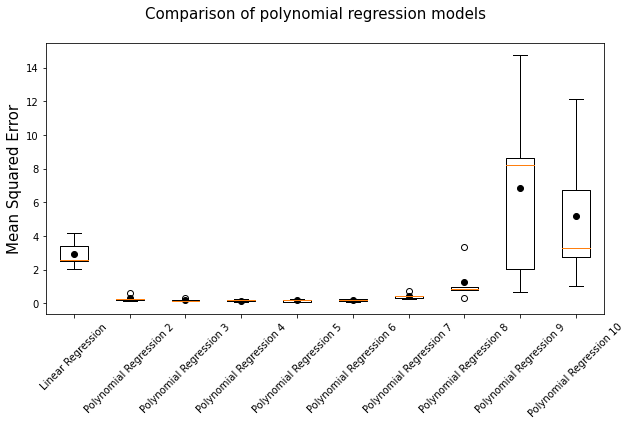

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Comparison of polynomial regression models', fontsize=15)

# mark the mean    
plt.scatter(np.arange(1,11), means, c="k")

ax.boxplot(results)
ax.set_ylabel('Mean Squared Error', fontsize=15)
ax.set_xticklabels(names, rotation=45)
plt.show()

In [7]:
from sklearn.model_selection import GridSearchCV
grid = GridSearchCV(make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()),
                    param_grid={'polynomialfeatures__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
                    cv=kfold,
                    refit=True,  scoring="neg_mean_squared_error")
#make_pipeline(PolynomialFeatures(degree=2), linear_model.LinearRegression()).get_params().keys()
grid.fit(X_train, y_train)
print(grid.best_params_)
print(grid.best_estimator_)

{'polynomialfeatures__degree': 4}
Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('linearregression', LinearRegression())])


In [8]:
from sklearn import  metrics
r2_train = metrics.r2_score(y_true=y_train, y_pred=grid.best_estimator_.predict(X_train))
r2_test = metrics.r2_score(y_true=y_test, y_pred=grid.best_estimator_.predict(X_test))

In [9]:
print(r2_train)
print(r2_test)

0.9959429046559244
0.9866290227891092


In [10]:
from sklearn.metrics import mean_squared_error, r2_score

score_train = []
score_test = []
for name, model in models:
    model.fit(X_train, y_train)
    score_train.append(mean_squared_error(y_true=y_train, y_pred=model.predict(X_train)))
    score_test.append(mean_squared_error(y_true=y_test, y_pred=model.predict(X_test)))
    

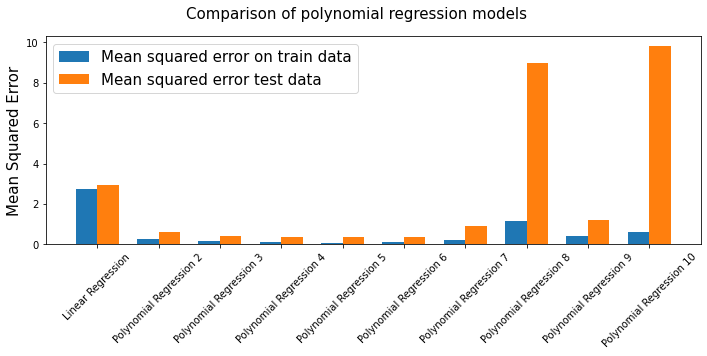

In [11]:
x = np.arange(len(names))  
width = 0.35  

fig, ax = plt.subplots(1, 1, figsize=(10,5))
fig.suptitle('Comparison of polynomial regression models', fontsize=15)
rects1 = ax.bar(x - width/2, score_train, width, label='Mean squared error on train data')
rects2 = ax.bar(x + width/2, score_test, width, label='Mean squared error test data')

ax.set_ylabel('Mean Squared Error', fontsize=15)
ax.set_xticks(x)
ax.set_xticklabels(names, rotation=45)
ax.legend(fontsize=15)

fig.tight_layout()

plt.show()